## Table of Contents
- [Import libraries](#1)
- [Download tables](#2)
- [Plotting Data](#3)
  - [Download plots](#3.1)
  - [Download plots with log10](#3.1)

<a name='1'></a>
# Import libraries

This snippet of code is typically found at the beginning of a Python script or notebook. 
It sets up the environment by importing various libraries and modules required for the tasks the script intends to perform.
These tasks might include data processing (pandas, numpy), file management (glob, os, pathlib), visualization (matplotlib, seaborn,
matplotlib_venn), and utility functions (time, re, tqdm).
The specific imports for Venn diagrams suggest that the script may be involved in set analysis or comparative data analysis.
The sys.path.append() call indicates that the script is part of a larger project, possibly a research project or thesis,
and it needs to include custom modules located in a specific directory within the system.

%load - a Jupyter Notebook command to load the contents of a file into a cell. In this case, it's the path to the base_imports.py file.


In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
from matplotlib.ticker import ScalarFormatter
sys.path.append(r"/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/")
%load_ext autoreload
%autoreload 2
from config import *
from functions import *
import time
import pathlib

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.5039281/matplotlib-cbl1exxh because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<a name = "2"></a>
# Download tables

These lines are part of a data loading process in a Python-based data analysis workflow.
The use of f-strings for file path construction suggests a modular approach to file management,
allowing for flexible data sourcing. The distinction between "filtered" and "original" indicates that
different datasets or different stages of data preprocessing are being handled. The low_memory=False parameter in both lines
is a deliberate choice to manage memory usage when dealing with CSV files that have columns with mixed data types,
which is common in real-world data sets. This code snippet is likely part of a larger data analysis pipeline,
possibly for a scientific study or data-driven project where data integrity and accurate representation of the
original and processed data are crucial.

In [2]:
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_FILTERING_OVARIAN}', sep=";",low_memory=False)

In [3]:
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_NON_FILTERING_OVARIAN}', sep="\t",low_memory=False)

This code snippet is likely part of a data processing routine where results from a comparative analysis are being managed and summarized. The use of DataFrame manipulation functions such as insert and indexing to create a new DataFrame from a subset of another's columns is common in data transformation processes. These operations facilitate the calculation of aggregate data and the preparation of data subsets for further analysis or reporting. The specific names of the columns and DataFrames suggest that the data may come from a biological or medical research context, where 'ohsu' and 'eth' could refer to different groups, conditions, or datasets.

In [4]:
out_df_filtered.insert(loc=4,column='sum',value=out_df_filtered['size_intersection']+out_df_filtered['size_ohsu\eth']+out_df_filtered['size_eth\ohsu'])
second_df=out_df_original[['sample','inter','ohsu_without_eth','eth_without_ohsu']]

<a name = "3"></a>
# Plottting data

Importing Libraries and Setting Configurations:
The code starts by importing necessary libraries, including matplotlib for plotting and numpy for numerical operations.
Configuration settings are applied for matplotlib, such as setting the font size for plots.
Data Preparation and Processing:
DataFrames are created and renamed for clarity, aligning data fields for subsequent analysis.
The script then iterates over a set of samples, processing data to generate lists of intersections and differences between datasets.
Filtering criteria are established and applied to the data, which is a common step in preparing data for visualization.
Graph Preparation:
The script builds structures for visual representation, such as preparing the x and y coordinates for plotting.
Lists for various filter conditions are created and filled with data derived from the previous processing steps.
The preparation includes combining filters for indexing and structuring the frame for the plots.
Plotting:
The script sets up parameters for bar plots, such as the width of bars and positions on the graph.
It generates bar plots for each sample using the data processed earlier, with conditional logic to handle different datasets and comparisons.
Functions from a custom plotting module are used to create bar plots and filtering bar plots, which suggests a focus on comparing multiple data conditions or categories.
Saving Output:
Paths for saving the plots are generated, indicating that the script will output visualizations as files.
The plots are likely saved in various formats, potentially for inclusion in a report or presentation.
Plot Customization and Display:
The code includes further customization of plots, such as setting labels and titles.
Final plot adjustments are made, and the plots are displayed, which would be the visual output of the script.

<a name = "3.1"></a>
## Download plots

Choose right filter


<Figure size 640x480 with 0 Axes>

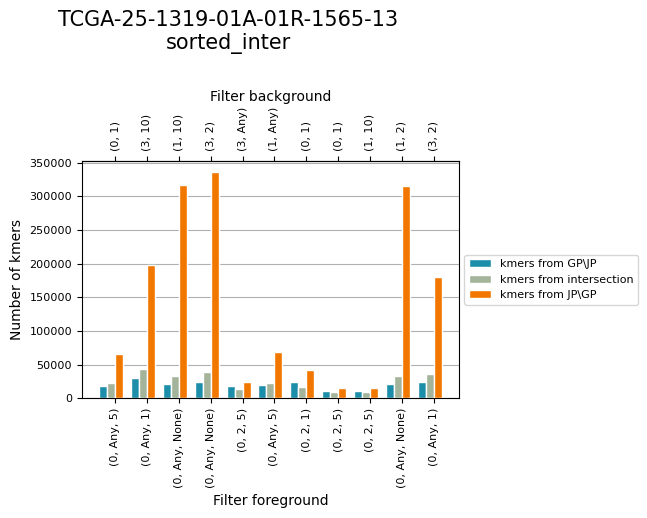

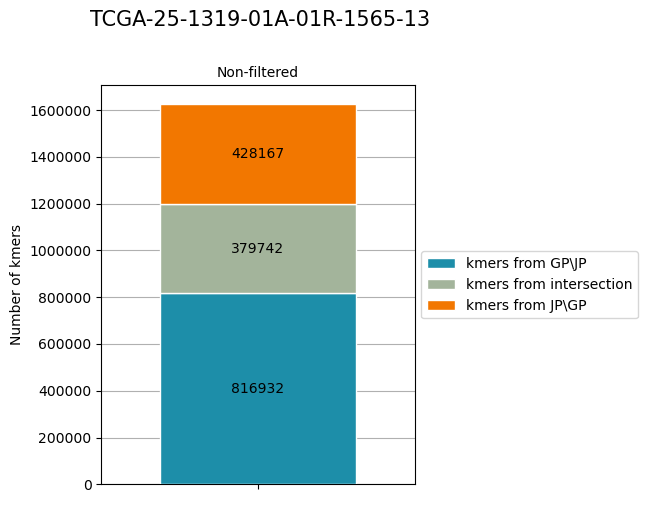

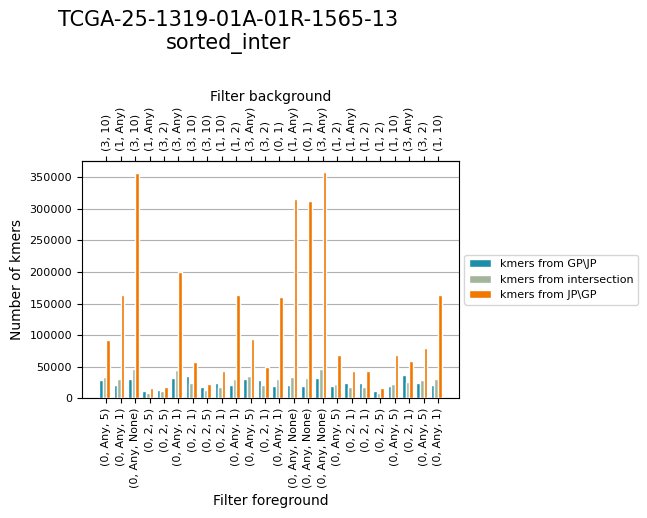

Choose right filter


<Figure size 640x480 with 0 Axes>

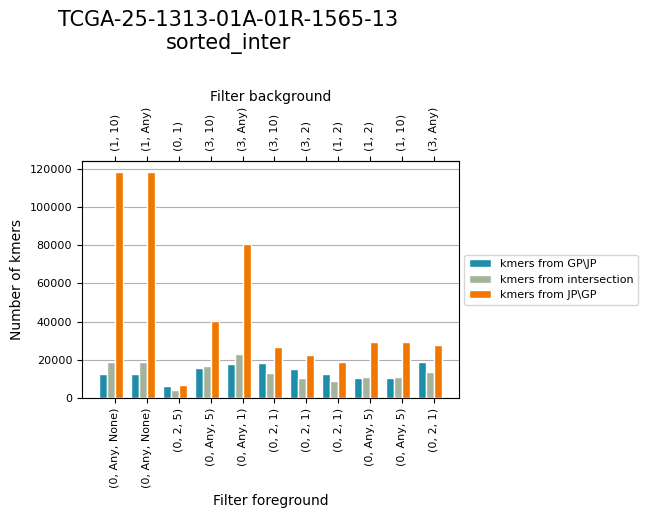

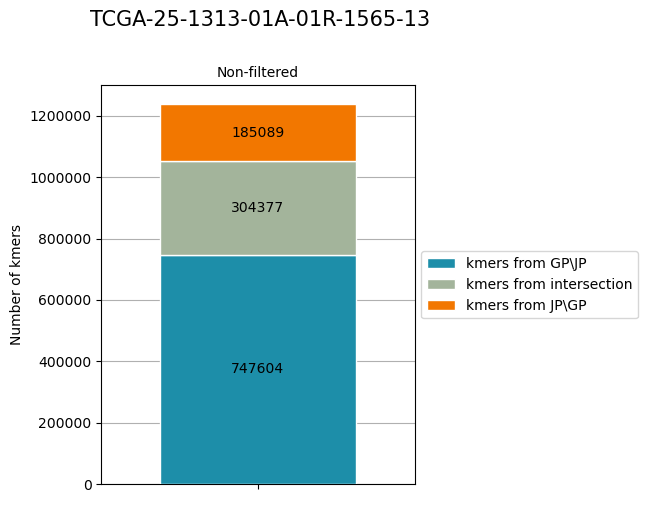

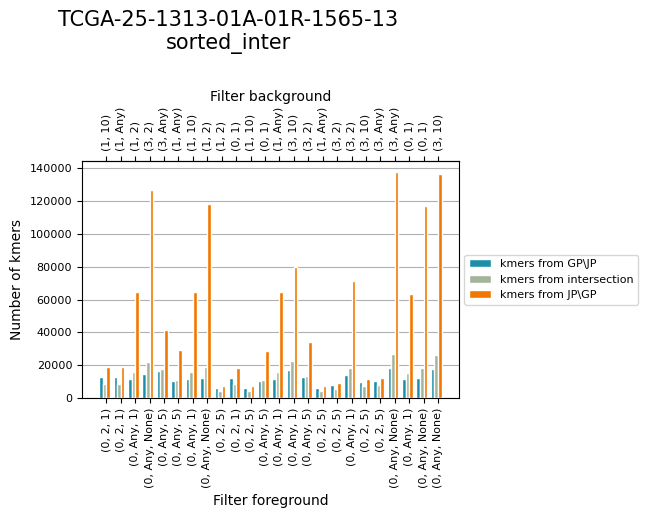

Choose right filter


<Figure size 640x480 with 0 Axes>

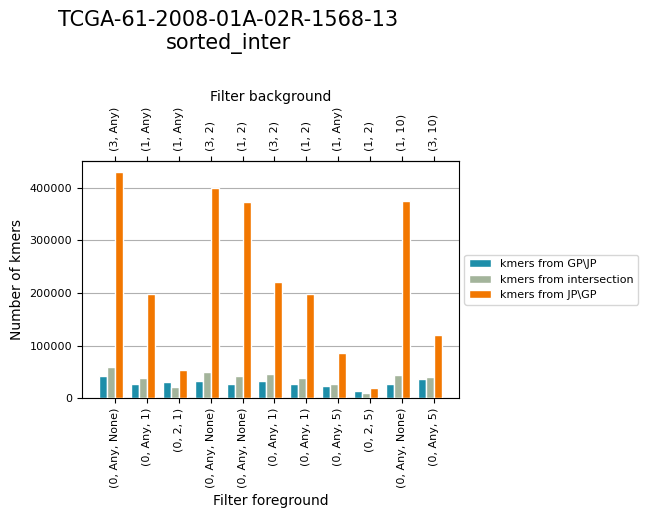

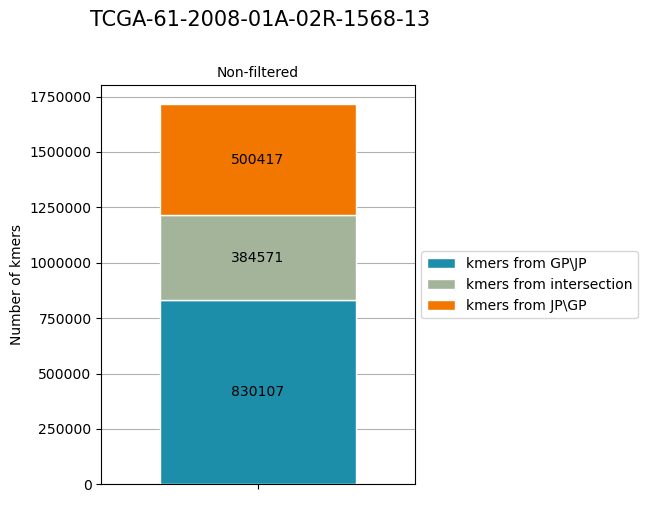

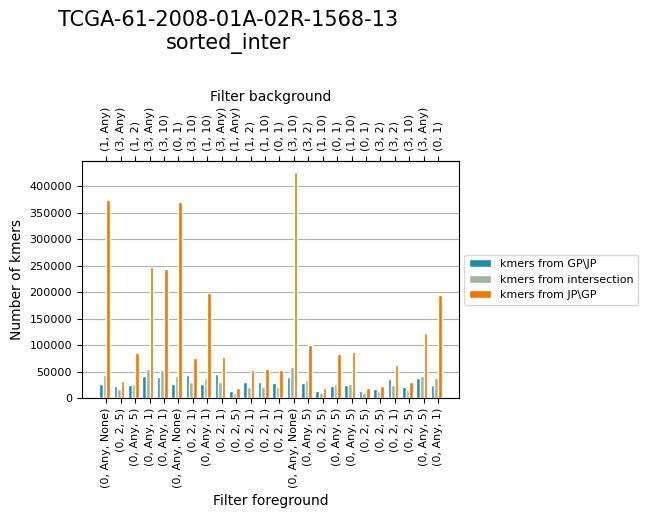

Choose right filter


<Figure size 640x480 with 0 Axes>

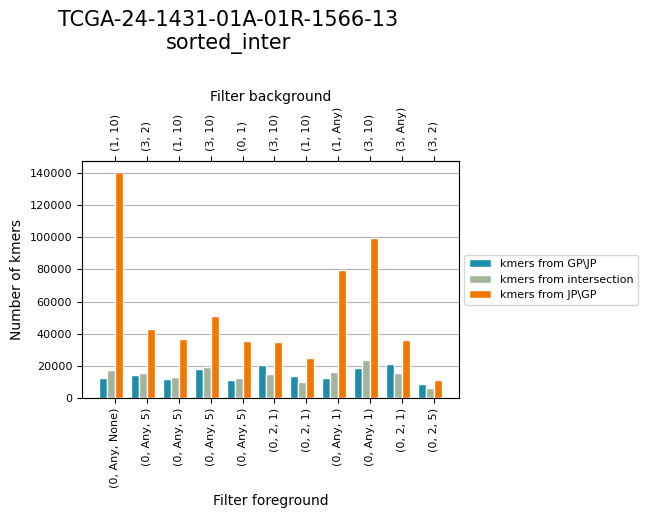

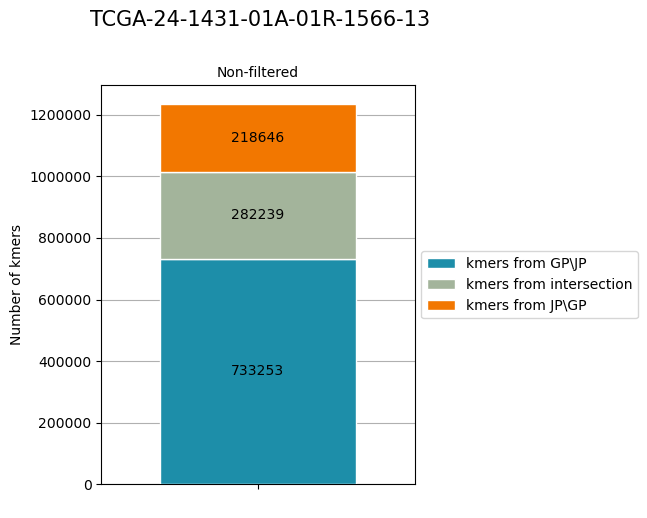

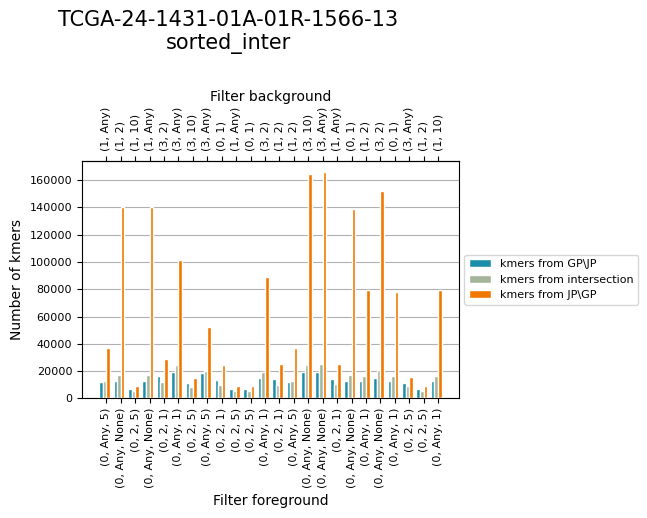

Choose right filter


<Figure size 640x480 with 0 Axes>

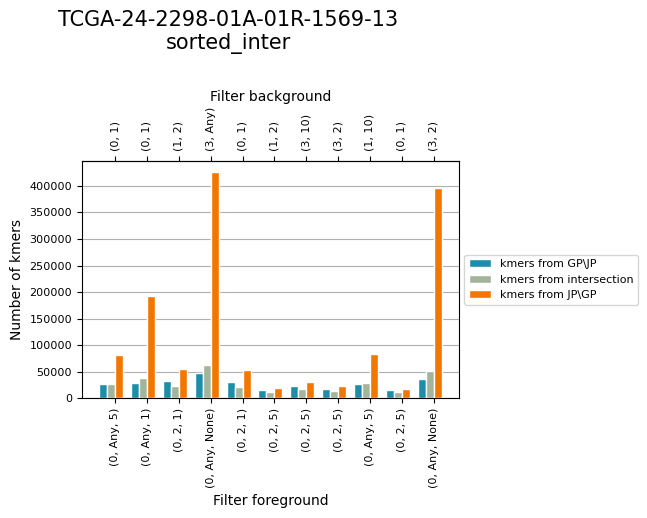

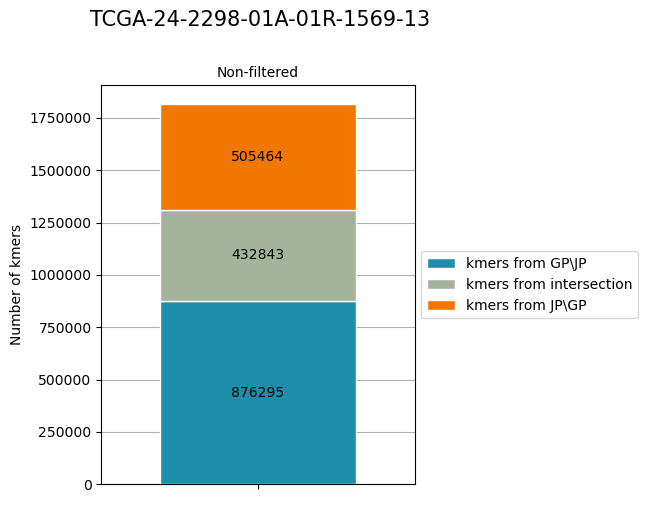

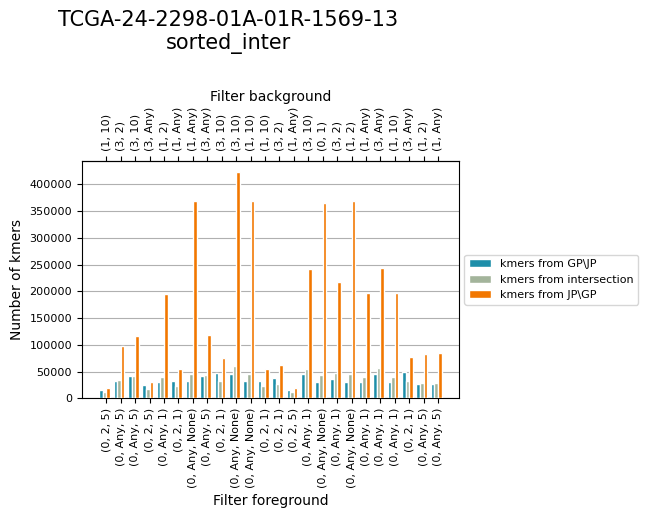

In [5]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math       
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_OVARIAN,NAME_TABLES,NAME_FINAL_OVARIAN])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)
    
    data_first=data_df.iloc[:data_df['sample'].count()//3]
    data_second = data_df.iloc[data_df['sample'].count()//3:]
    
    inter_first=list(data_first['size_intersection'])
    s_ETH_first=list(data_first['size_eth\ohsu'])
    s_OHSU_first=list(data_first['size_ohsu\eth'])
    
    inter_second=list(data_second['size_intersection'])
    s_ETH_second=list(data_second['size_eth\ohsu'])
    s_OHSU_second=list(data_second['size_ohsu\eth'])
    
    filter_foreground_first = list(data_first['filter_foreground'])
    filter_background_first = list(data_first['filter_background'])
    filter_foreground_second = list(data_second['filter_foreground'])
    filter_background_second = list(data_second['filter_background'])
    
    inter2=list(second_df['size_intersection'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    ySalt=''
    
    l=len(s_ETH_first)
    filfor_first = filter_foreground_first
    filfor_second  = filter_foreground_second 
    filbac_first = filter_background_first 
    filbac_second = filter_background_second 
    

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])
        
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    
    # Frame structure building
    name=['kmers from GP\JP','kmers from intersection','kmers from JP\GP']
    v_first=[s_ETH_first,inter_first,s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]
    
    
    axis2 = {
            'kmers from GP\JP':s_ETH2,
            'kmers from intersection':inter2,
            'kmers from JP\GP':s_OHSU2
            }
    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    lg2 = len(filfor2)
    
    #Plotting sample data
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_main_second = filfor_second
    x_secondary_second = filbac_second
    x_secondary2 = filbac2
    
    plt.figure()


    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    bottom2 =np.zeros(lg2)
    bar_width=0.5
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    bar_position_ETH2 = range(len(axis2['kmers from GP\JP']))
    salt = SALT = PLOT_SORT_BY

    path_sample_absolut_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PNG])
    path_sample_absolut_pdf_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PDF])
    path_sample_absolut_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PNG])
    path_sample_absolut_pdf_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE,sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PDF])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE,sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'kmers', SALT,PLOT_TYPE,sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_absolut_first,path_sample_absolut_pdf_first,coor=False)
    
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf, coor=False)
    
    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_absolut_second,path_sample_absolut_pdf_second,coor=False)
    

<a name = "3.1"></a>
## Download plots with log10

Choose right filter


<Figure size 640x480 with 0 Axes>

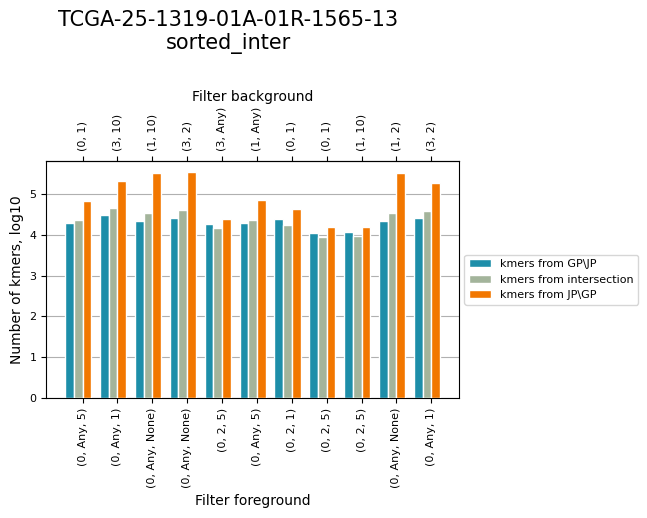

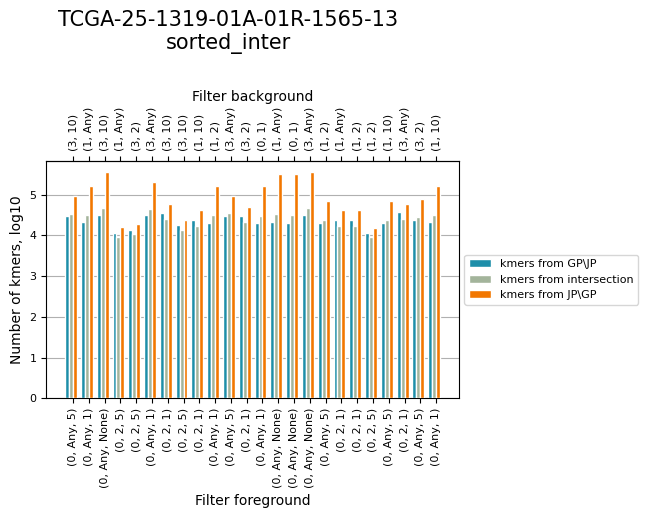

Choose right filter


<Figure size 640x480 with 0 Axes>

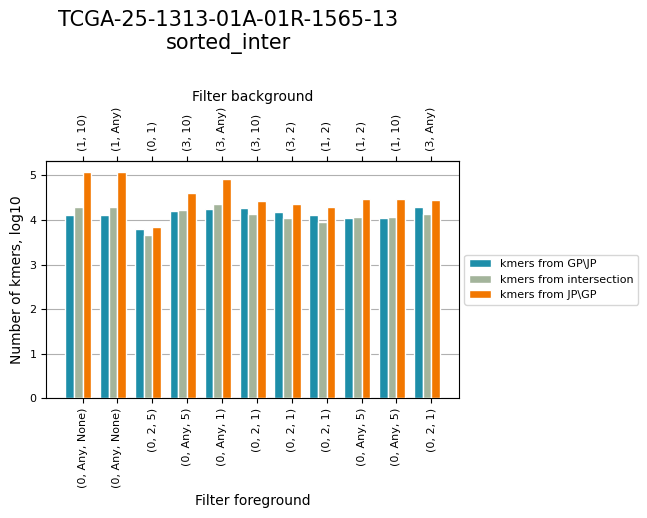

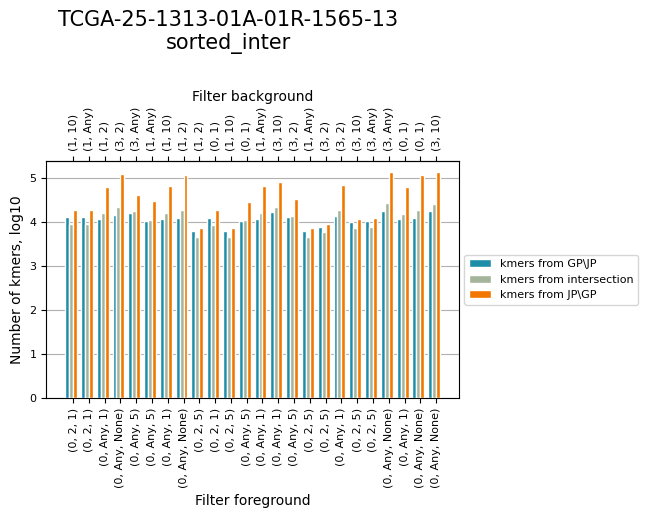

Choose right filter


<Figure size 640x480 with 0 Axes>

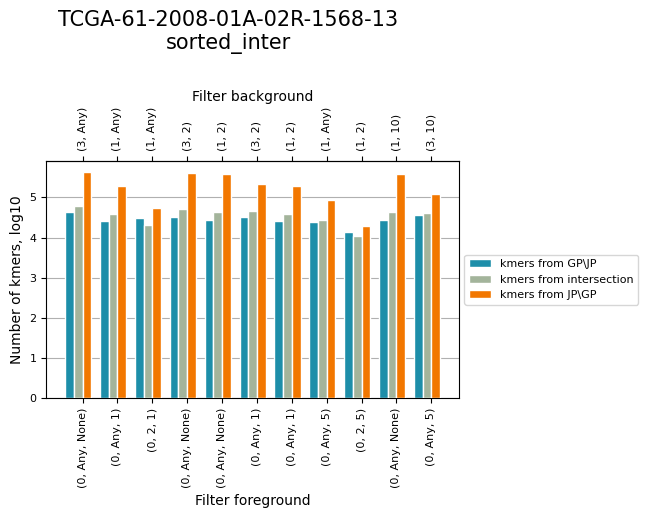

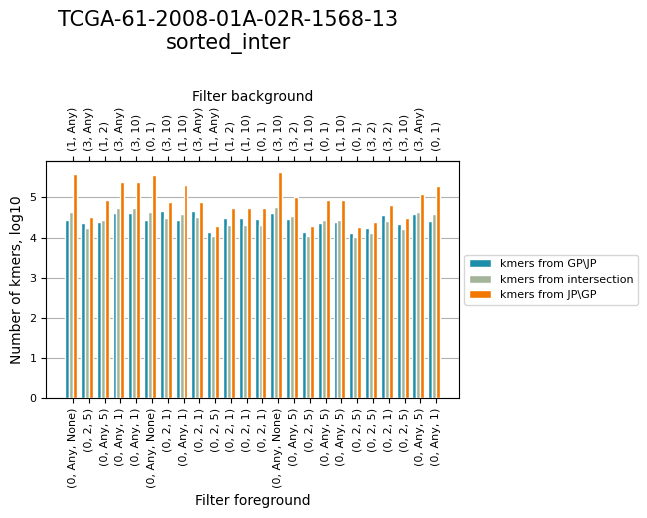

Choose right filter


<Figure size 640x480 with 0 Axes>

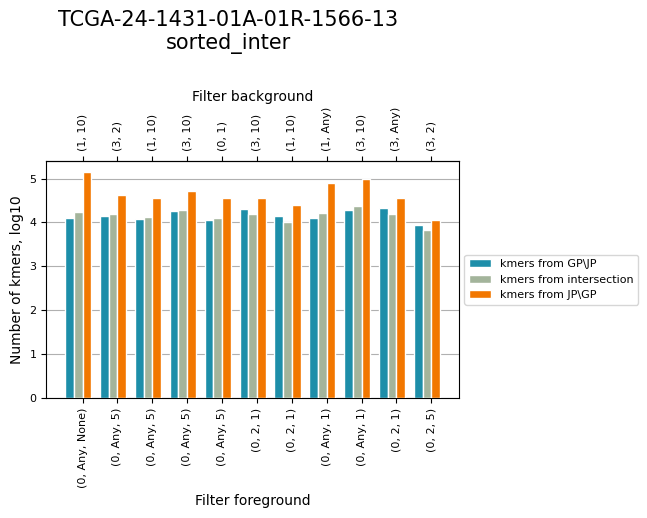

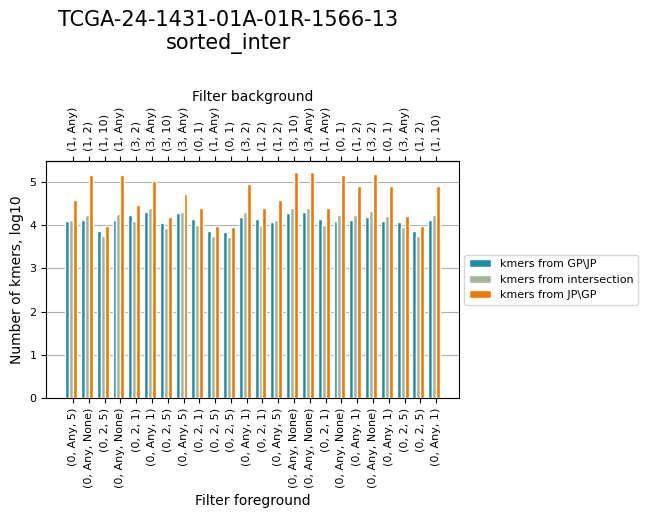

Choose right filter


<Figure size 640x480 with 0 Axes>

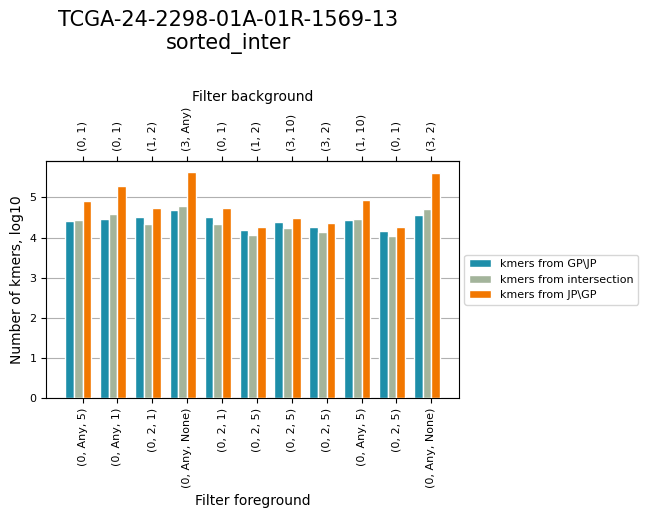

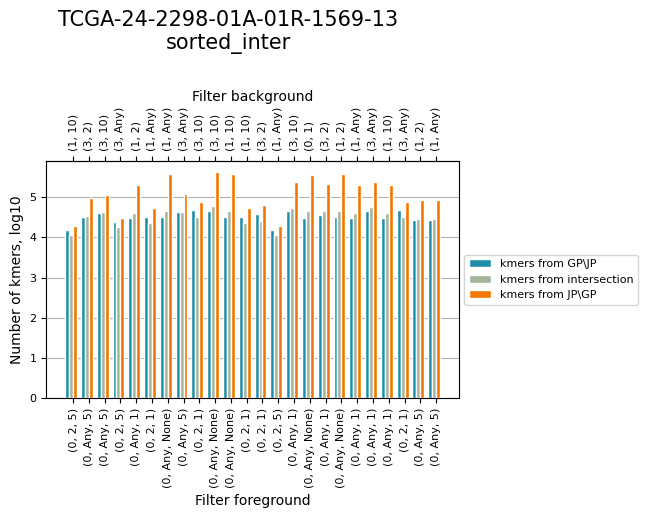

In [6]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math       
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_OVARIAN,NAME_TABLES,NAME_FINAL_OVARIAN])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)
    
    data_first=data_df.iloc[:data_df['sample'].count()//3]
    data_second = data_df.iloc[data_df['sample'].count()//3:]
    
    inter_first=np.log10(data_first['size_intersection'])
    s_ETH_first=np.log10(data_first['size_eth\ohsu'])
    s_OHSU_first=np.log10(data_first['size_ohsu\eth'])
    
    inter_second=np.log10(data_second['size_intersection'])
    s_ETH_second=np.log10(data_second['size_eth\ohsu'])
    s_OHSU_second=np.log10(data_second['size_ohsu\eth'])
    
    filter_foreground_first = list(data_first['filter_foreground'])
    filter_background_first = list(data_first['filter_background'])
    filter_foreground_second = list(data_second['filter_foreground'])
    filter_background_second = list(data_second['filter_background'])
    
    inter2=list(second_df['size_intersection'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    ySalt=', log10'
    
    l=len(s_ETH_first)
    filfor_first = filter_foreground_first
    filfor_second  = filter_foreground_second 
    filbac_first = filter_background_first 
    filbac_second = filter_background_second 
    

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])
        
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    
    # Frame structure building
    name=['kmers from GP\JP','kmers from intersection','kmers from JP\GP']
    v_first=[s_ETH_first,inter_first,s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]
    
    
    axis2 = {
            'kmers from GP\JP':s_ETH2,
            'kmers from intersection':inter2,
            'kmers from JP\GP':s_OHSU2
            }
    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    lg2 = len(filfor2)
    
    #Plotting sample data
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_main_second = filfor_second
    x_secondary_second = filbac_second
    x_secondary2 = filbac2
    
    plt.figure()


    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    bottom2 =np.zeros(lg2)
    bar_width=0.5
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    bar_position_ETH2 = range(len(axis2['kmers from GP\JP']))
    salt = SALT = PLOT_SORT_BY

    path_sample_absolut_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PNG])
    path_sample_absolut_pdf_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PDF])
    path_sample_absolut_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PNG])
    path_sample_absolut_pdf_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PDF])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, 'kmers', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_absolut_first,path_sample_absolut_pdf_first,ySalt=ySalt,coor=False)
    
    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_absolut_second,path_sample_absolut_pdf_second,ySalt=ySalt,coor=False)
    